# PHYS 321 Midterm 2021

This midterm exam is an open-book, open-resource exam. However, you may not collaborate with anyone. Please send clarification questions and hint requests to me at [adrian.liu@mcgill.ca](mailto:adrian.liu2@mcgill.ca). Submission is via Github (more details below). The exam is due at 11:59:59 Eastern on February 25th, 2020.

You may copy and paste code from your previous assignments, but __you must cite your sources__. E.g., if you want to use a function that you wrote in Coding Lab 02, please include the comment "this function was copied from Coding Lab 02"

For questions that are more algebraic or conceptual, you may either: 1) type your answer here, 2) do your work on paper and scan it, or 3) write up your answer in a separate pdf document. If you decide to go with option 2 or 3 on any particular question, be sure to let us know which document to look at. (Or with option 2 you can also embed the image file in the notebook itself).

## Question 1

Place all of the midterm files in a folder within your Github repo. Then:

__a)__ Perform an initial commit locally and push to your Github repo. Write down the commands you used below.

## Your answer here
mv Midterm 2020/ DataSci_Lab

git pull origin main

git add Midterm2020

git commit -m "added midterm folder"

git push origin main

__b)__ Create a file named ``secret_treasure.txt``. Commit it. Now create a new branch. Write down the commands that you used.

## Your answer here

touch secret_treasure.txt

git add secret_treasure.txt

git commit -m "create secret_treasure.txt"

git checkout -b "new_branch"

__c)__ Add the text ``I'm a Bayesian`` to the file in this new branch. In your old branch, add the text ``I'm a Frequentist``. Write down the commands that you used.

## Your answer here
vi secret_treasure.txt

(add "I'm a bayesian" in vi using insert command 'i' and 'wq' to write and quit)

git add secret_treasure.txt

git commit -m "modified secret_treasure.txt"

git checkout main

vi secret_treasure.txt

(add "I'm a frequentist" in vi using insert command 'i' and 'wq' to write and quit)

git add secret_treasure.txt

git commit -m "modified secret_treasure.txt"

__d)__ Merge the changes from your new branch to your old branch. If you get a merge conflict, deal with it in whatever way you want. Write down the commands that you used.

## Your answer here
git merge new_branch

"Auto-merging Midterm2021/secret_treasure.txt
CONFLICT (content): Merge conflict in Midterm2021/secret_treasure.txt
Automatic merge failed; fix conflicts and then commit the result."

vi secret_treasure.txt

delete <<<< and ====== HEAD things etc. 

Push your local changes to your Github repo to complete this problem.

## Question 2

In Coding Lab 01, we discussed how the sidereal day is shorter than a solar day by 4 minutes. Is it possible for the sidereal day on some planet to be __longer__ than the solar day? Explain. If it's helpful, you may include a diagram of some sort.

Yes -- should the earth be orbiting the sun in the opposite direction (with the spin of the earth remaining as is), the solar day would be shorter than the sidereal day.

## Question 3

 Consider the following HR diagram:

<div>
<img src="HR_filled.png" width="400">
</div>

 The $b$ colour is measured through a filter that permits light to pass through if it is within the wavelength range $300\,\textrm{nm} \lesssim \lambda \lesssim 650\,\textrm{nm}$. The $r$ (``red") filter allows light in the range $650\,\textrm{nm} \lesssim \lambda \lesssim 1000\,\textrm{nm}$ to pass through. The $g$ filter covers both ranges.

__a)__ Which side (the left side or the right side) of the HR diagrams corresponds to bluer stars?

left

__b)__ Star $\#1$ has a $(b-r)$ colour of 3.5, while Star $\#2$ has a $(b-r)$ colour of 2. Which star has the higher luminosity? What is the ratio of their luminosities?

star 2. L_(2)/L_(1) is roughly 6.3 -- star 2 is 6.3 times brighter than star 1.

In [200]:
m2=8
m1=10
ratio = 10**((m2-m1)/(-2.5))
ratio

6.309573444801933

__c)__ Suppose you see a star with an apparent $g$-band magnitude of 8. The star has $(b-r)$ colour of $1$. How far away is this star?

39.8 parsecs

__d)__ In the previous part, were you computing an angular diameter distance or a luminosity distance? Suppose you had computed the other one instead. Would the answer have been very similar, or would it have been quite different?

We were computing luminosity distance. If we had computed the angular diameter distance, we would not have been able to tell the difference because the object is too close. 

__e)__ What is the redshift at which an object's angular diameter distance and its luminosity distance differ by $10\%$? How old was our Universe when it emitted the light that we see today? How much smaller or larger was the universe back then compared to now?

Text(0, 0.5, 'distance, Mpc')

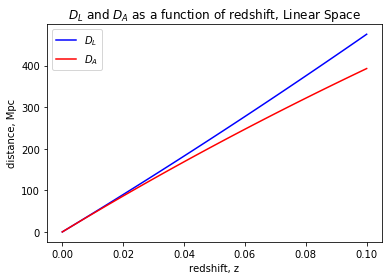

In [201]:
from astropy.cosmology import Planck15
import matplotlib.pyplot as plt
import numpy as np
#COPIED FROM CODING LAB 2

cosmo = Planck15
zmin = 0.00001
zmax = 0.1
n=100


def plot_DL(cosmo,zmin,zmax,n,scale):
    z_arr = np.linspace(zmin,zmax,n).tolist()
    D_l = cosmo.luminosity_distance(z_arr).value.tolist()
    if scale=='lin':
        plt.plot(z_arr,D_l,color='blue',label='$D_L$')
    if scale=='log':
        j=0
        for i in range(len(z_arr)):
            z = z_arr[j]
            d = D_l[j]
            if z==0 or d==0:
                del z_arr[j]
                del D_l[j]
            else:
                j=j+1
        plt.plot(np.log(z_arr),np.log(D_l),color='blue',label='$D_L$')
    return D_l

def plot_DA(cosmo,zmin,zmax,n,scale):
    z_arr = np.linspace(zmin,zmax,n).tolist()
    D_a = cosmo.angular_diameter_distance(z_arr).value.tolist()
    if scale=='lin':
        plt.plot(z_arr,D_a,color='red',label='$D_A$')
    if scale=='log':
        j=0
        for i in range(len(z_arr)):
            z = z_arr[j]
            d = D_a[j]
            if z==0 or d==0:
                del z_arr[j]
                del D_a[j]
            else:
                j=j+1
        plt.plot(np.log(z_arr),np.log(D_a),color='red',label='$D_A$')
    return D_a

D_l = plot_DL(cosmo,zmin,zmax,n,'lin')
D_a = plot_DA(cosmo,zmin,zmax,n,'lin')
plt.legend()
plt.title("$D_L$ and $D_A$ as a function of redshift, Linear Space")
plt.xlabel('redshift, z')
plt.ylabel('distance, Mpc')

In [202]:
i=0
z= np.linspace(zmin,zmax,n)
for d in D_l:
    ratio = D_a[i]/d
    if ratio<0.9:
        print("D_L:",d)
        print("D_a:",D_a[i])
        print("Redshift at which there is a 10% difference:",z[i])
        print("Age of universe at this redshift:",Planck15.age(z[i]))
        a = 1/(1+z[i])
        print("The universe was this fraction of the size compared to today:",a)
        break
    else:
        i=i+1


D_L: 251.33585111981893
D_a: 226.0060628559762
Redshift at which there is a 10% difference: 0.05455000000000001
Age of universe at this redshift: 13.040646222743579 Gyr
The universe was this fraction of the size compared to today: 0.9482717746906263


## Question 4

You and your friends are on holiday in southern California, where it doesn’t rain very much: 5 out of 365 days per year. You want to go to the beach tomorrow. Unfortunately, the weather forecast says that it will rain tomorrow. When it actually rains, the forecast is correct 90\% of the time. When it doesn’t, there is a 10\% chance that rain is incorrectly predicted by the forecast. What is the probability that it will rain tomorrow, knowing what the weather forecast says?

In [203]:
p_rain = 5/365
p_forecast_rain = 0.9
p_forecast_norain = 0.1
p_norain = 360/365
p_forecast = (p_forecast_rain*p_rain)+(p_forecast_norain*p_norain)
p_rain_forecast = (p_forecast_rain*p_rain)/p_forecast
print("Probability that it will rain tomorrow knowign the weather forecast",p_rain_forecast)

Probability that it will rain tomorrow knowign the weather forecast 0.1111111111111111


## Question 5

The probability distribution for the speed $v$ of a particle in an ideal gas is given by the _Maxwell-Boltzmann_ distribution:

\begin{equation}
4 \pi \left(\frac{m}{2 \pi k_b T} \right)^{3/2}  v^2 \exp \left( \frac{-mv^2}{2 k_b T} \right),
\end{equation}

where $k_b$ is Boltzmann's constant, $m$ is the mass of an atom in the gas, and $T$ is the temperature. You can integrate this to confirm that it's correctly normalized if you like! (Incidentally, the wikipedia page on the Maxwell-Boltzmann distribution contains some typos, and a bunch of their expressions are incorrect).

__a)__ Suppose we have an ideal gas in the lab. Let's assume that we know what type of gas we have, so the mass is known. To simplify matters, work in units where $m / k_b = 1$. You go into the lab and you make _one_ measurement of velocity (i.e., you measure the speed of _one_ atom). You get $v = 20$ (in our weird units).

You'd like to know the temperature of the gas. Prof. Mxyptlk says "the temperature measures the _average_ kinetic energy of a particle; therefore, with just a single speed measurement we can't know anything about the temperature". Prove Prof. Mxyptlk wrong by inferring what you can about $T$, the temperature of the gas.

<class 'numpy.ndarray'>


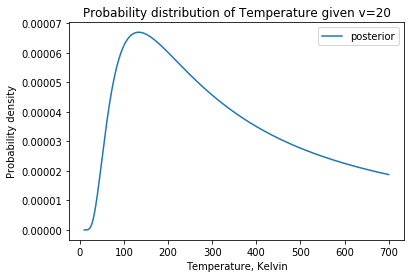

In [204]:
import numpy as np
import matplotlib.pyplot as plt

def prior(T_min,T_max,N):
    prob = [1/(T_max-T_min)]*N
    return np.array(prob)

def boltzmann(v,T):
    x1 = np.pi*4*(1/(np.pi*2*T))**(3/2)
    x2 = v**2
    x3 = np.exp((-v**2)/(2*T))
    x = x1*x2*x3
    return np.array(x)

def likelihood(v,T,length):
    p_likelihood = 1
    if length==1:
        p_likelihood = boltzmann(v,T)
    if length>1:
        for speed in v:
            p_likelihood = p_likelihood*bolzmann(speed,T)
    return np.array(p_likelihood)

def posterior(v,T,length):
    T_min = np.min(T)
    T_max = np.max(T)
    p_prior = prior(T_min,T_max,len(T))
    p_likelihood = likelihood(v,T,length)
    p_posterior = p_prior*p_likelihood
    return p_posterior
    
#speeds = np.linspace(0,100,101)
v=20
temps = np.linspace(10,700,1000)
print(type(temps))

plt.plot(temps,posterior(v,temps,1),label='posterior')
#plt.plot(temps,likelihood(v,temps,1)/100,label='likelihood')
#plt.plot(temps,prior(10,450,301),label='prior')
plt.legend()
plt.xlabel('Temperature, Kelvin')
plt.ylabel('Probability density')
plt.title("Probability distribution of Temperature given v=20")
plt.show()

In [205]:
p_max = 0
t_max = 0
probs = posterior(v,temps,1)
for i in range(len(temps)):
    p_max_temp = probs[i]
    if p_max_temp>p_max:
        p_max = p_max_temp
        t_max = temps[i]
T_probable = np.max(posterior(v,temps,1))
print("Most probable temperature of the particle in deg K:",t_max)

Most probable temperature of the particle in deg K: 133.63363363363362


__b)__ What is the 95\% credibility region for your inferred $T$?

In [207]:
## Your answer here
#COPIED STRAIGHT FROM LAB 3

def get_n_credible_region(data_vals, posterior_pmf, n):
    """
    Take in a posterior distribution for data b and return a specified n% credible region.
    """
    
    #Get the upper and lower bounds of the n% credible region
    P_max = 0.5 + n/2
    P_min = 0.5 - n/2
    P_median = 0.5
    
    #Add up the cumulative probability and find the b_vals that correspond to the specified bounds & median
    min_found = False
    max_found = False
    median_found = False
    cumulative_prob = 0
    dx = data_vals[2]-data_vals[1]
    data_min=0
    data_median=0
    data_max = 0
    
    #Get the cumulative probability at each point and handle renormalization
    cumulative_prob_list = np.zeros(len(posterior_pmf))
    for i in range(len(posterior_pmf)):
        p = posterior_pmf[i]
        cumulative_prob += p*dx #need to sum the area under curve, multiply by dx every time
        cumulative_prob_list[i] = cumulative_prob

    cumulative_renormalized = cumulative_prob_list/max(cumulative_prob_list)

    for i in range(len(posterior_pmf)):
        c_prob = cumulative_renormalized[i]

        if (c_prob>P_min) and not min_found:
            data_min = data_vals[i]
            min_found = True
            #print('min found')

        if (c_prob>P_median) and not median_found:
            data_median = data_vals[i]
            median_found = True
            #print('med found')

        if (c_prob>P_max) and not max_found:
            data_max = data_vals[i]
            max_found = True
            #print('max found')
    
    print(n,'% confidence region centered on',round(data_median,3),'spans from',round(data_min,3),'to',round(data_max,3))
    
    return data_median, data_min, data_max
            
n = 0.95
temps = np.linspace(1,700,100000) #add more points to get a better integral
v=20
p_post = posterior(v,temps,1)
t_median, t_min, t_max = get_n_credible_region(temps, p_post, n)


0.95 % confidence region centered on 271.523 spans from 62.24 to 666.294


__c)__ You take a few more measurements: $v=(30, 28.5, 18, 15, 20, 20)$. Update your knowledge of $T$, stating your assumptions.

In [ ]:
v_array = [30,28.5,18,15,20,20] #new array of velocities

#posterior function that lets you take in a prior
def posterior_new(v,T,length,p_prior):
    p_likelihood = likelihood(v,T,length)
    p_posterior = p_prior*p_likelihood
    return p_posterior

#first prior function is just uniform
T_min = np.min(temps)
T_max = np.max(temps)
p_prior = prior(T_min,T_max,len(temps))

#set first old prior to the uniform one
old_prior = p_prior
for v in v_array:
    p_post = posterior_new(v,temps,1,old_prior)
    old_prior = p_post #posterior becomes prior for next iteration
        
plt.plot(temps,p_post,label='posterior')
plt.legend()
plt.xlabel('Temperature, Kelvin')
plt.ylabel('Probability density')
plt.title("Probability distribution of Temperature given v=20")
plt.show()

__d)__ Prof. Mxyptlk says "ok, ok, but you had to know the mass of the gas. If you didn't know $m$ separately and had to infer $m$ and $T$ simultaneously, you wouldn't get a nice well-defined peak in your probability distribution for $v$. You'd basically find that any value of $T$ is possible." Do you agree with Prof. Mxyptlk?

* If you agree, explain why and give an example of a probability distribution where reasonable simultaneous constraints on $v$ and $T$ are still possible (i.e., imagine you have the ability to modify the laws of nature to slightly modify the Maxwell-Boltzmann distribution).
* If you disagree, explain why Prof. Mxyptlk is incorrect.


We can marginalize the nuisance parameter (m), which would be possible if the distribution were instead gaussian for example. 

## Question 6

Kevin likes dumplings. He goes to inspect a dumpling factory, where they claim that the length of their dumplings $L$ is Gaussian distributed with mean $4\,\textrm{cm}$ and a standard deviation of $1\,\textrm{cm}$. Kevin randomly selects $10$ dumplings and measures their lengths, obtaining

$L = (5.61, 2.22, 3.11, 6.01, 4.79, 3.70, 2.67, 3.90, 3.86, 3.48)\,\textrm{cm}$



__a)__ Use Bayesian inference to infer the posterior distribution for the mean and standard deviation of dumpling size at this factory. Display your results graphically.

In [ ]:
from scipy.stats import norm

def prior(L_arr, mean, std):
    p_prior = norm.pdf(L_arr , mean, std)
    return p_prior
#define the range of the plotting and prior assumptions
L_arr = np.linspace(0,10,200)
mean_prior = 4
std_prior = 1
p_prior = prior(L_arr,mean_prior,std_prior)

#define the data
L_data = [5.61,2.22,3.11,6.01,4.79,3.70,2.67,3.90,3.86,3.48]
mean_data = np.mean(L_data)
std_data = np.std(L_data)


def likelihood(L_arr,mean_data,std_data):
    p_likelihood = norm.pdf(L_arr,mean_data,std_data)
    return p_likelihood


def posterior(L_arr,mean_prior,std_prior,mean_data,std_data):
    p_likelihood = likelihood(L_arr,mean_data,std_data)
    p_prior = prior(L_arr,mean_prior,std_prior)
    p_posterior = p_likelihood*p_prior
    return p_posterior , p_likelihood, p_prior

p_posterior , p_likelihood, p_prior = posterior(L_arr,mean_prior,std_prior,mean_data,std_data)
plt.plot(L_arr,p_posterior,label='posterior')
plt.plot(L_arr,p_likelihood,label='likelihood')
plt.plot(L_arr,p_prior,label='prior')
plt.xlabel("mean dumpling length")
plt.ylabel("probability density")
plt.legend()
plt.show()

__b)__ What Kevin really cares about is consistency. It doesn't really matter to him whether the dumplings are big or small. What's unacceptable to him is a standard deviation that's larger than $1\,\textrm{cm}$. Should Kevin be worried? Make your argument in a quantitative manner.

In [ ]:
dump_median, dump_min, dump_max = get_n_credible_region(L_arr, p_posterior, 0.6828)
x = (dump_max-dump_min)
std = x/2
print("standard deviation:",std)
print("this is less than 1cm so he's FINE.")

## Ungraded question

I would like to tailor the last part of the course to your interests. Please fill out [this](https://forms.gle/BFJMx8HEnfQjjbuC9) anonymous survey to help me with that. This is not a graded part of your midterm, but now is just a convenient time to do it.

## Submission

You're done! Do a final git commit, taking care to include everything relevant (e.g., if you have any embedded images). If you decide to revise your answers before the deadline, no problem---just make the changes you want to make and resubmit your work. Push your work to your repo.